# 1 逻辑回归
在训练的初始阶段，构建一个逻辑回归模型来预测，某个学生是否被大学录取。
设想你是大学相关部门的管理者，想通过申请学生两次测试的评分，来决定他们是否被录取。
现在你拥有之前申请学生的可以用于训练逻辑回归的训练样本集。对于每一个训练样本，你有他们两次测试的评分和最后是被录取的结果。

## 1.1 数据可视化

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = 'Machine_Learning_Ex/machine-learning-ex2/ex2/ex2data1.txt'
data = pd.read_csv(path, header=None, names=['Exam 1', 'Exam 2', 'Admitted'])
data.head()

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


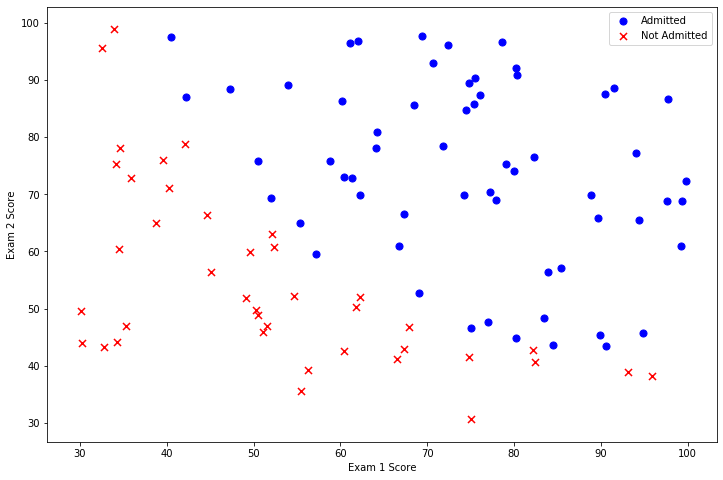

In [3]:
positive = data[data['Admitted'].isin([1])]
negative = data[data['Admitted'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['Exam 1'], positive['Exam 2'], s=50, c='b', marker='o', label='Admitted')
ax.scatter(negative['Exam 1'], negative['Exam 2'], s=50, c='r', marker='x', label='Not Admitted')
ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')
plt.show()

## 1.2 实现
### 1.2.1 sigmoid 函数
逻辑回归函数为:$$h_\theta=g(\theta^Tx)$$

g代表一个常用的逻辑函数（logistic function）为S形函数（Sigmoid function），公式为：$$g(z)=\frac{1}{1+{{e}^{-z}}}$$

合起来，我们得到逻辑回归模型的假设函数：$${{h}_{\theta }}\left( x \right)=\frac{1}{1+{{e}^{-{{\theta }^{T}}X}}}$$

In [4]:
# 实现sigmoid函数
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

绘制图像

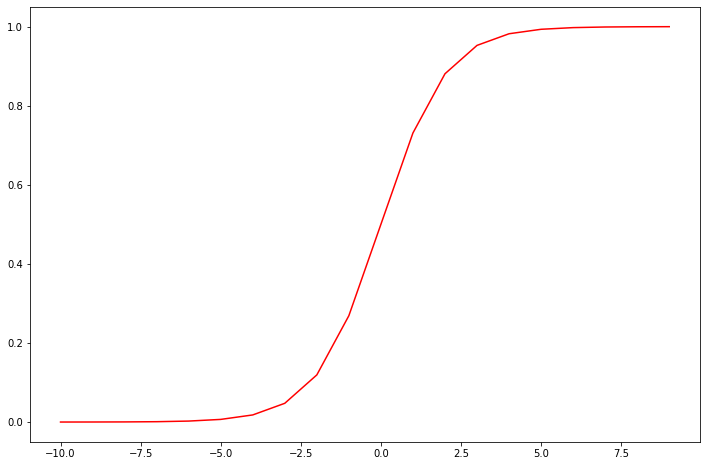

In [5]:
nums = np.arange(-10, 10, step=1)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(nums, sigmoid(nums), 'r')
plt.show()

### 1.2.2 代价函数和梯度
代价函数：$$J\left( \theta  \right)=\frac{1}{m}\sum\limits_{i=1}^{m}{[-{{y}^{(i)}}\log \left( {{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)-\left( 1-{{y}^{(i)}} \right)\log \left( 1-{{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)]}$$

In [6]:
# 实现代价函数
def cost(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
    return np.sum(first - second) / (len(X))

初始化X，y，theta

In [7]:
# 加一列常数列
data.insert(0, 'Ones', 1)

# 初始化X，y，θ
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]
theta = np.zeros(3)

# 转换X，y的类型
X = np.array(X.values)
y = np.array(y.values)

# 检查矩阵的维度
X.shape, theta.shape, y.shape

((100, 3), (3,), (100, 1))

In [8]:
# 用初始θ计算代价
cost(theta, X, y)

0.6931471805599453

梯度：$$\frac{\partial J\left( \theta  \right)}{\partial {{\theta }_{j}}}=\frac{1}{m}\sum\limits_{i=1}^{m}{({{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}})x_{_{j}}^{(i)}}$$

虽然这个梯度和前面线性回归的梯度很像，但是要记住是不一样的
实现完成后，用初始代入计算，结果应该是0.693左右

In [9]:
# 实现梯度计算的函数（并没有更新θ）
def gradient(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)
    
    error = sigmoid(X * theta.T) - y
    
    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        grad[i] = np.sum(term) / len(X)
    
    return grad

### 1.2.3 用工具库计算θ的值

In [10]:
import scipy.optimize as opt
result = opt.fmin_tnc(func=cost, x0=theta, fprime=gradient, args=(X, y))
result

(array([-25.16131872,   0.20623159,   0.20147149]), 36, 0)

看看在这个结论下代价函数计算结果是什么样子

In [11]:
# 用θ的计算结果代回代价函数计算
cost(result[0], X, y)

0.20349770158947425

画出决策曲线

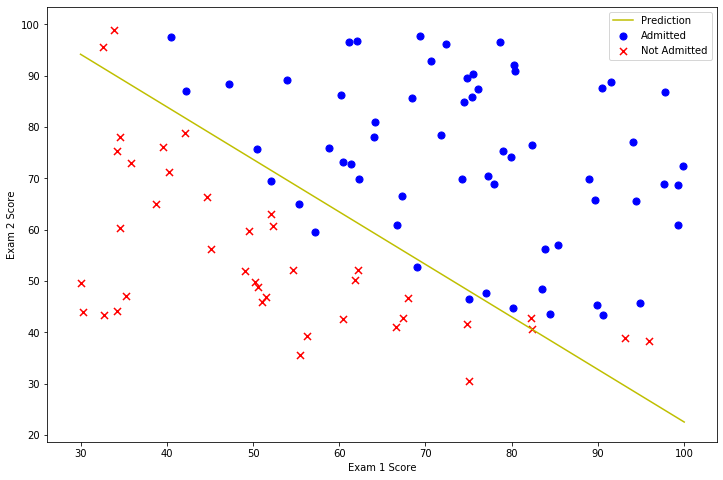

In [12]:
plotting_x1 = np.linspace(30, 100, 100)
plotting_h1 = ( - result[0][0] - result[0][1] * plotting_x1) / result[0][2]

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(plotting_x1, plotting_h1, 'y', label='Prediction')
ax.scatter(positive['Exam 1'], positive['Exam 2'], s=50, c='b', marker='o', label='Admitted')
ax.scatter(negative['Exam 1'], negative['Exam 2'], s=50, c='r', marker='x', label='Not Admitted')
ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')
plt.show()

### 1.2.4 评价逻辑回归模型
在确定参数之后，我们可以使用这个模型来预测学生是否录取。如果一个学生exam1得分45，exam2得分85，那么他录取的概率应为0.776

In [13]:
# 实现h（θ）
def hfunc1(theta, X):
    return sigmoid(np.dot(theta.T, X))
hfunc1(result[0],[1,45,85])

0.776290625526598

另一种评价θ的方法是看模型在训练集上的正确率怎样。写一个predict的函数，给出数据以及参数后，会返回“1”或者“0”。然后再把这个predict函数用于训练集上，看准确率怎样。

In [14]:
# 定义预测函数
def predict(theta, X):
    probability = sigmoid(X * theta.T)
    return [1 if x >= 0.5 else 0 for x in probability]
# 统计预测正确率
theta_min = np.matrix(result[0])
predictions = predict(theta_min, X)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]
accuracy = (sum(map(int, correct)) % len(correct))
print ('accuracy = {0}%'.format(accuracy))

accuracy = 89%


# 2 正则化逻辑回归
这部分实现加入正则项提升逻辑回归算法。
设想你是工厂的生产主管，你有一些芯片在两次测试中的测试结果，测试结果决定是否芯片要被接受或抛弃。你有一些历史数据，帮助构建一个逻辑回归模型。

## 2.1 数据可视化

In [15]:
path =  'Machine_Learning_Ex/machine-learning-ex2/ex2/ex2data2.txt'
data_init = pd.read_csv(path, header=None, names=['Test 1', 'Test 2', 'Accepted'])
data_init.head()

,Test 1,Test 2,Accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


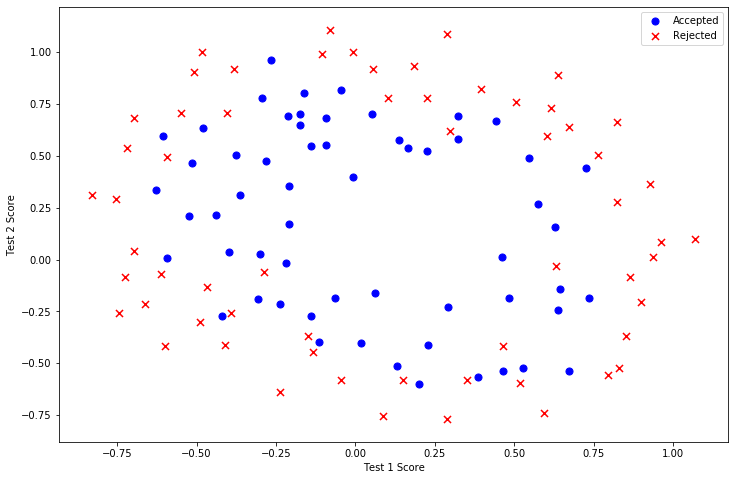

In [16]:
positive2 = data_init[data_init['Accepted'].isin([1])]
negative2 = data_init[data_init['Accepted'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive2['Test 1'], positive2['Test 2'], s=50, c='b', marker='o', label='Accepted')
ax.scatter(negative2['Test 1'], negative2['Test 2'], s=50, c='r', marker='x', label='Rejected')
ax.legend()
ax.set_xlabel('Test 1 Score')
ax.set_ylabel('Test 2 Score')
plt.show()

这个数据集不能像之前一样使用直线将两部分分割。而逻辑回归只适用于线性的分割，所以，这个数据集不适合直接使用逻辑回归。

## 2.2 特征映射
一种更好的使用数据集的方式是为每组数据创造更多的特征。所以我们为每组添加了最高到6次幂的特征

In [17]:
degree = 6
data2 = data_init
x1 = data2['Test 1']
x2 = data2['Test 2']

data2.insert(3, 'Ones', 1)

for i in range(1, degree+1):
    for j in range(0, i+1):
        data2['F' + str(i-j) + str(j)] = np.power(x1, i-j) * np.power(x2, j)
#？？？？？？？？？这块没看懂

data2.drop('Test 1', axis=1, inplace=True)
data2.drop('Test 2', axis=1, inplace=True)

data2.head()

,Accepted,Ones,F10,F01,F20,F11,F02,F30,F21,F12,...,F23,F14,F05,F60,F51,F42,F33,F24,F15,F06
0,1,1,0.051267,0.69956,0.002628,0.035864,0.489384,0.000135,0.001839,0.025089,...,0.000900,0.012278,0.167542,1.815630e-08,2.477505e-07,0.000003,0.000046,0.000629,0.008589,0.117206
1,1,1,-0.092742,0.68494,0.008601,-0.063523,0.469143,-0.000798,0.005891,-0.043509,...,0.002764,-0.020412,0.150752,6.362953e-07,-4.699318e-06,0.000035,-0.000256,0.001893,-0.013981,0.103256
2,1,1,-0.213710,0.69225,0.045672,-0.147941,0.479210,-0.009761,0.031616,-0.102412,...,0.015151,-0.049077,0.158970,9.526844e-05,-3.085938e-04,0.001000,-0.003238,0.010488,-0.033973,0.110047
3,1,1,-0.375000,0.50219,0.140625,-0.188321,0.252195,-0.052734,0.070620,-0.094573,...,0.017810,-0.023851,0.031940,2.780914e-03,-3.724126e-03,0.004987,-0.006679,0.008944,-0.011978,0.016040
4,1,1,-0.513250,0.46564,0.263426,-0.238990,0.216821,-0.135203,0.122661,-0.111283,...,0.026596,-0.024128,0.021890,1.827990e-02,-1.658422e-02,0.015046,-0.013650,0.012384,-0.011235,0.010193


## 3.2 代价函数和梯度
这一部分要实现计算逻辑回归的代价函数和梯度的函数。代价函数公式如下：

$\theta_0$不需要正则化的，下标从1开始。梯度更新公式为：

\begin{align}
  & Repeat\text{ }until\text{ }convergence\text{ }\!\!\{\!\!\text{ } \\ 
 & \text{     }{{\theta }_{0}}:={{\theta }_{0}}-a\frac{1}{m}\sum\limits_{i=1}^{m}{[{{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}}]x_{_{0}}^{(i)}} \\ 
 & \text{     }{{\theta }_{j}}:={{\theta }_{j}}-a\frac{1}{m}\sum\limits_{i=1}^{m}{[{{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}}]x_{j}^{(i)}}+\frac{\lambda }{m}{{\theta }_{j}} \\ 
 & \text{          }\!\!\}\!\!\text{ } \\ 
 & Repeat \\ 
\end{align}

对上面的算法中 j=1,2,...,n 时的更新式子进行调整可得：$${{\theta }_{j}}:={{\theta }_{j}}(1-a\frac{\lambda }{m})-a\frac{1}{m}\sum\limits_{i=1}^{m}{({{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}})x_{j}^{(i)}}$$

把初始（所有元素为0）带入，代价应为0.693

In [18]:
# 实现正则化的代价函数
def costReg(theta, X, y, learningRate):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
    reg = (learningRate / (2 * len(X))) * np.sum(np.power(theta[:,1:theta.shape[1]], 2))
    return np.sum(first - second) / len(X) + reg

In [19]:
# 实现正则化的梯度函数
def gradientReg(theta, X, y, learningRate):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)
    
    error = sigmoid(X * theta.T) - y
    
    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        
        if (i == 0):
            grad[i] = np.sum(term) / len(X)
        else:
            grad[i] = (np.sum(term) / len(X)) + ((learningRate / len(X)) * theta[:,i])
    
    return grad

In [20]:
# 初始化X，y，θ
cols = data2.shape[1]
X2 = data2.iloc[:,1:cols]
y2 = data2.iloc[:,0:1]
theta2 = np.zeros(cols-1)

# 进行类型转换
X2 = np.array(X2.values)
y2 = np.array(y2.values)

# λ设为1
learningRate = 1

In [21]:
# 计算初始代价
costReg(theta2, X2, y2, learningRate)

0.6931471805599454

### 2.3.1 用工具库求解参数

In [22]:
result2 = opt.fmin_tnc(func=costReg, x0=theta2, fprime=gradientReg, args=(X2, y2, learningRate))
result2

(array([ 1.27271027,  0.62529965,  1.18111686, -2.01987399, -0.9174319 ,
        -1.43166929,  0.12393227, -0.36553118, -0.35725403, -0.17516291,
        -1.45817009, -0.05098418, -0.61558554, -0.27469165, -1.19271298,
        -0.2421784 , -0.20603299, -0.04466178, -0.2777895 , -0.29539514,
        -0.45645981, -1.04319154,  0.02779373, -0.2924487 ,  0.0155576 ,
        -0.32742405, -0.1438915 , -0.92467487]),
 32,
 1)

使用第1部分中的预测函数来查看我们的方案在训练数据上的准确度

In [23]:
theta_min = np.matrix(result2[0])
predictions = predict(theta_min, X2)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y2)]
accuracy = (sum(map(int, correct)) % len(correct))
print ('accuracy = {0}%'.format(accuracy))

accuracy = 98%


## 2.4 画决策曲线

In [24]:
def hfunc2(theta, x1, x2):
    temp = theta[0][0]
    place = 0
    for i in range(1, degree+1):
        for j in range(0, i+1):
            temp+= np.power(x1, i-j) * np.power(x2, j) * theta[0][place+1]
            place+=1
    return temp

def find_decision_boundary(theta):
    t1 = np.linspace(-1, 1.5, 1000)
    t2 = np.linspace(-1, 1.5, 1000)

    cordinates = [(x, y) for x in t1 for y in t2]
    x_cord, y_cord = zip(*cordinates)
    h_val = pd.DataFrame({'x1':x_cord, 'x2':y_cord})
    h_val['hval'] = hfunc2(theta, h_val['x1'], h_val['x2'])

    decision = h_val[np.abs(h_val['hval']) < 2 * 10**-3]
    return decision.x1, decision.x2

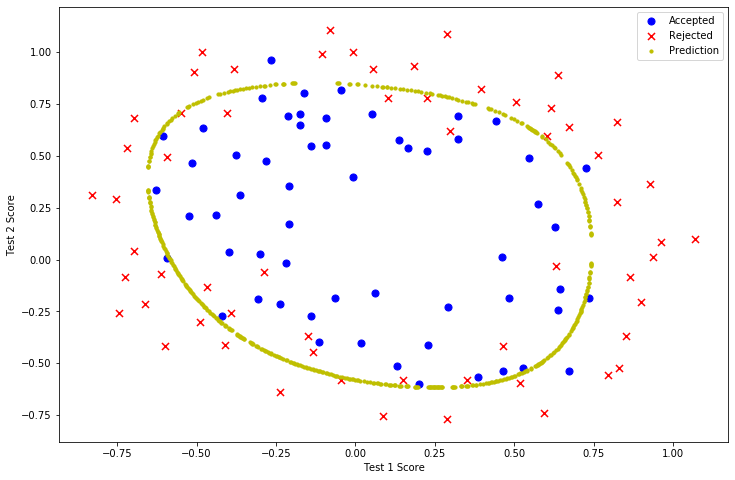

In [25]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive2['Test 1'], positive2['Test 2'], s=50, c='b', marker='o', label='Accepted')
ax.scatter(negative2['Test 1'], negative2['Test 2'], s=50, c='r', marker='x', label='Rejected')
ax.set_xlabel('Test 1 Score')
ax.set_ylabel('Test 2 Score')

x, y = find_decision_boundary(result2)
plt.scatter(x, y, c='y', s=10, label='Prediction')
ax.legend()
plt.show()

## 2.5 改变λ，观察决策曲线
λ=0时过拟合

In [26]:
learningRate2 = 0
result3 = opt.fmin_tnc(func=costReg, x0=theta2, fprime=gradientReg, args=(X2, y2, learningRate2))
result3

(array([ 9.64875717e+00,  1.30089400e+01,  5.12258889e-02, -1.04547183e+02,
        -5.79799929e+01, -3.88798208e+01, -1.14202233e+02, -6.38746951e+01,
        -3.35260738e+01,  1.99190948e+01,  4.04673828e+02,  3.35610078e+02,
         4.04247721e+02,  1.87433112e+02,  4.89968744e+01,  2.17570904e+02,
         2.56873181e+02,  3.10518168e+02,  1.65620366e+02,  7.69169893e+01,
        -5.83784068e+00, -5.09899992e+02, -5.88163529e+02, -8.15477922e+02,
        -6.28644103e+02, -6.07032843e+02, -2.72337770e+02, -4.34492916e+01]),
 280,
 3)

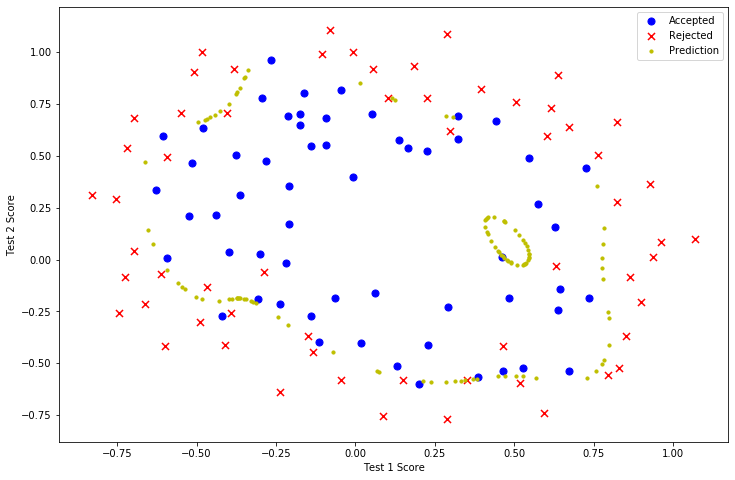

In [27]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive2['Test 1'], positive2['Test 2'], s=50, c='b', marker='o', label='Accepted')
ax.scatter(negative2['Test 1'], negative2['Test 2'], s=50, c='r', marker='x', label='Rejected')
ax.set_xlabel('Test 1 Score')
ax.set_ylabel('Test 2 Score')

x, y = find_decision_boundary(result3)
plt.scatter(x, y, c='y', s=10, label='Prediction')
ax.legend()
plt.show()

λ=100时欠拟合

In [28]:
learningRate3 = 100
result4 = opt.fmin_tnc(func=costReg, x0=theta2, fprime=gradientReg, args=(X2, y2, learningRate3))
result4

(array([ 0.02187847, -0.0174817 ,  0.00571065, -0.05516901, -0.01314874,
        -0.03859873, -0.01846356, -0.00773219, -0.00892429, -0.02280461,
        -0.04343846, -0.00235623, -0.01415612, -0.00349507, -0.04143595,
        -0.02100593, -0.00471917, -0.00359131, -0.00632226, -0.0050244 ,
        -0.03197683, -0.03416334, -0.00107629, -0.00702615, -0.00038507,
        -0.0079823 , -0.00154779, -0.04108683]),
 11,
 1)

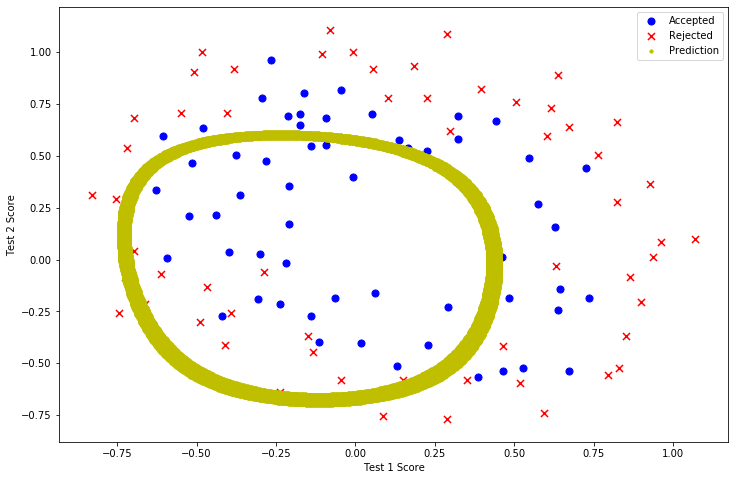

In [29]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive2['Test 1'], positive2['Test 2'], s=50, c='b', marker='o', label='Accepted')
ax.scatter(negative2['Test 1'], negative2['Test 2'], s=50, c='r', marker='x', label='Rejected')
ax.set_xlabel('Test 1 Score')
ax.set_ylabel('Test 2 Score')

x, y = find_decision_boundary(result4)
plt.scatter(x, y, c='y', s=10, label='Prediction')
ax.legend()
plt.show()